In [1]:

import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


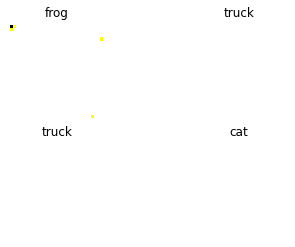

In [2]:
# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

# Show some CIFAR10 images
plt.subplot(221)
plt.imshow(xTrain[0])
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(xTrain[1])
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(xVal[0])
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow(xTest[0])
plt.axis('off')
plt.title(classesName[yTest[0]])
plt.savefig(baseDir+'svm0.png')
# plt.clf()
plt.show()
# print(xTrain[0])

In [3]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [4]:

#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=yTrain[:3000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

[6 9 9 ... 6 6 4]
(3000, 3072)
(3000,)


In [5]:
from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xVal)
    acc_test = np.mean(Yhat_svc_linear_test == yVal)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))

Train Accuracy = 0.354667
Test Accuracy = 0.098000
Train Accuracy = 0.484667
Test Accuracy = 0.188000
Train Accuracy = 0.709333
Test Accuracy = 0.253000
Train Accuracy = 0.989667
Test Accuracy = 0.286000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000


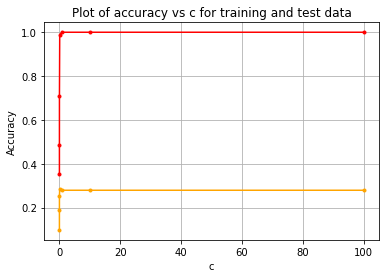

In [6]:

c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

In [7]:

acc_train_svm_poly = []
acc_test_svm_poly = []

def svm_polynomial(c):

    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    
    svc_polynomial.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(xTrain)
    acc_train = np.mean(Yhat_svc_polynomial_train == yTrain)
    acc_train_svm_poly.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(xVal)
    acc_test = np.mean(Yhat_svc_polynomial_test == yVal)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))

Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.120667
Accuracy = 0.087000
Accuracy = 0.272333
Accuracy = 0.125000
Accuracy = 0.722000
Accuracy = 0.265000
Accuracy = 0.963667
Accuracy = 0.256000
Accuracy = 0.998667
Accuracy = 0.247000


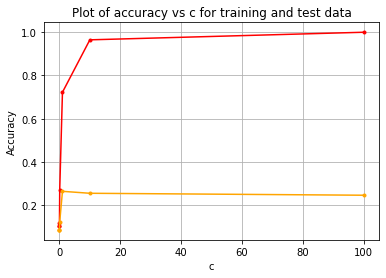

In [8]:
c_svm_poly = [0.0001,0.001,0.01,0.1,1,10,100]


for c in c_svm_poly:
    svm_polynomial(c)

plt.plot(c_svm_poly, acc_train_svm_poly,'.-',color='red')
plt.plot(c_svm_poly, acc_test_svm_poly,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()


In [9]:
#Try more values of c for polynomial kernel.
c_svm_poly_extended=[200,500,1000]
for c in c_svm_poly_extended:
    svm_polynomial(c)


Accuracy = 1.000000
Accuracy = 0.254000
Accuracy = 1.000000
Accuracy = 0.256000
Accuracy = 1.000000
Accuracy = 0.256000


In [10]:

def svm_rbf(c, g):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = g)
    
    # Fit the classifier on the training set.
    svc_rbf.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_rbf_train = svc_rbf.predict(xTrain)
    acc = np.mean(Yhat_svc_rbf_train == yTrain)
    print('Train Accuracy = {0:f}'.format(acc))
    acc_train_svm_rbf.append(acc)
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_rbf_test = svc_rbf.predict(xVal)
    acc = np.mean(Yhat_svc_rbf_test == yVal)
    print('Test Accuracy = {0:f}'.format(acc))
    acc_test_svm_rbf.append(acc)

Train Accuracy = 0.107333
Test Accuracy = 0.079000
Train Accuracy = 0.107333
Test Accuracy = 0.079000
Train Accuracy = 0.107333
Test Accuracy = 0.079000
Train Accuracy = 0.307333
Test Accuracy = 0.119000
Train Accuracy = 0.487333
Test Accuracy = 0.119000
Train Accuracy = 0.848333
Test Accuracy = 0.105000
Train Accuracy = 1.000000
Test Accuracy = 0.119000


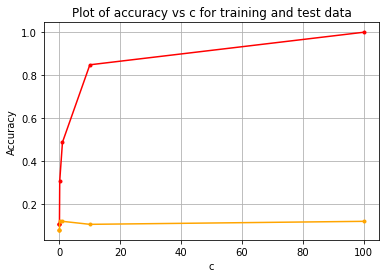

In [11]:
acc_train_svm_rbf= []
acc_test_svm_rbf = []
c_svm_rbf = [0.0001,0.001,0.01,0.1,1,10,100]

for c in c_svm_rbf:
     svm_rbf(c, 'auto')
    
plt.plot(c_svm_rbf, acc_train_svm_rbf,'.-',color='red')
plt.plot(c_svm_rbf, acc_test_svm_rbf,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

In [12]:

# for i in range(len(acc_train_svm_linear)): 
#     acc_train_svm_linear[i]=round(acc_train_svm_linear[i],3)
#     acc_test_svm_linear[i]=round(acc_test_svm_linear[i],3)
#     acc_train_svm_poly[i]=round(acc_train_svm_poly[i],3)
#     acc_test_svm_poly[i]=round(acc_test_svm_poly[i],3)
#     acc_train_svm_rbf[i]=round(acc_train_svm_rbf[i],3)
#     acc_test_svm_rbf[i]=round(acc_test_svm_rbf[i],3)
    

    
print("SVM Linear Training Accuracy = ", acc_train_svm_linear)
print("SVM Linear Test Accuracy = ", acc_test_svm_linear)
print("SVM Polynomial Training Accuracy = ", acc_train_svm_poly)
print("SVM Polynomial Test Accuracy = ", acc_test_svm_poly)
print("SVM RBF Training Accuracy = ", acc_train_svm_rbf)
print("SVM RBF Test Accuracy = ", acc_test_svm_rbf)

SVM Linear Training Accuracy =  [0.3546666666666667, 0.4846666666666667, 0.7093333333333334, 0.9896666666666667, 1.0, 1.0, 1.0]
SVM Linear Test Accuracy =  [0.098, 0.188, 0.253, 0.286, 0.279, 0.279, 0.279]
SVM Polynomial Training Accuracy =  [0.10733333333333334, 0.10733333333333334, 0.12066666666666667, 0.2723333333333333, 0.722, 0.9636666666666667, 0.9986666666666667, 1.0, 1.0, 1.0]
SVM Polynomial Test Accuracy =  [0.087, 0.087, 0.087, 0.125, 0.265, 0.256, 0.247, 0.254, 0.256, 0.256]
SVM RBF Training Accuracy =  [0.10733333333333334, 0.10733333333333334, 0.10733333333333334, 0.30733333333333335, 0.48733333333333334, 0.8483333333333334, 1.0]
SVM RBF Test Accuracy =  [0.079, 0.079, 0.079, 0.119, 0.119, 0.105, 0.119]


In [13]:
#Train with 10000 examples with linear kernel (c=0.1)

# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [14]:

xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

from sklearn import svm
svc = svm.SVC(probability = False, kernel = 'linear', C = 0.1)
svc.fit(xTrain, yTrain)

[6 9 9 ... 1 1 5]
(10000, 3072)
(10000,)


SVC(C=0.1, kernel='linear')

In [15]:

Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test))

Test Accuracy = 0.293000


In [16]:

def plt_img(x):
    nrow = 32
    ncol = 32
    ncolors=3
    xsq = x.reshape((nrow,ncol,ncolors))
    plt.imshow(xsq)
#     plt.xticks([])
#     plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


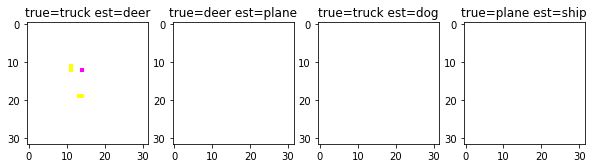

In [17]:
#Plotting some of the errors
Ierr = np.where((Yhat_svc_linear_test != yVal))[0]
nplt = 4
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Ierr[i]    
    plt_img(xVal[ind,:])        
    title = 'true={0:s} est={1:s}'.format(classesName[yVal[ind].astype(int)], classesName[Yhat_svc_linear_test[ind].astype(int)])
    plt.title(title)

In [18]:
import os
import time
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

# #Normalize 
# xTrain=((xTrain/255)*2)-1 
# print(xTrain.shape)
# print(xTrain[0])

#Running SVM 
xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="linear", C=0.1)
svc.fit(xTrain, yTrain)

Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test))

(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
[6 9 9 ... 1 1 5]
(10000, 3072)
(10000,)
Test Accuracy = 0.306000


In [19]:
import os
import time
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)


meanImage = np.mean(xTrain, axis=0)
print(meanImage.shape)
print('---------------------')
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage



print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])



#Running SVM 
xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="linear", C=0.1)
svc.fit(xTrain, yTrain)

Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test))

(32, 32, 3)
---------------------
(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[-71.64189796 -73.98173469 -69.47391837 ...  -3.64218367 -33.86195918
 -42.39957143]
[6 9 9 ... 1 1 5]
(10000, 3072)
(10000,)
Test Accuracy = 0.306000


### Cumulative Explained Variance against Number of Components

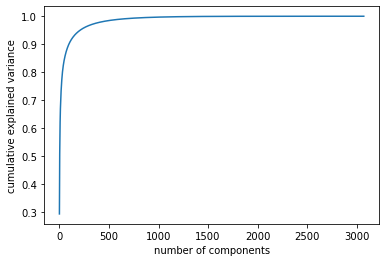

In [20]:
combined=np.vstack((xTrain,xVal))
from sklearn.decomposition import PCA
pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
print(pca.explained_variance_ratio_.cumsum()[149])
print(pca.explained_variance_ratio_.cumsum()[499])

0.9306473212588604
0.984641073551845


### Using 150 dimensions

In [22]:
# Reduce to 150 dimensions.
pca = PCA(n_components=150) # project from 3072 to 150 dimensions
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(150,)
(150, 3072)
(11000, 3072)
(11000, 150)


In [23]:
x_train=projected[:10000,:]
y_train=yTrain

x_test=projected[10000:,:]
y_test=yVal

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 150)
(10000,)
(1000, 150)
(1000,)


In [25]:
from sklearn import svm   #After running various iterations, the polynomial kernel was chosen as the best kernel in this case.
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [26]:
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Train Accuracy = 0.675800
[6 9 9 ... 1 1 7]


In [27]:
pred = svc.predict(x_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
print(pred)

Test Accuracy = 0.403000
[8 4 2 7 2 2 0 8 2 3 7 9 9 2 4 3 2 2 8 2 2 1 4 2 8 2 9 2 2 8 4 1 2 4 3 9 2
 7 2 3 1 6 8 8 6 1 2 4 5 2 0 2 5 4 8 4 6 9 7 2 8 2 2 9 9 9 1 0 4 3 2 7 2 4
 4 2 7 2 3 0 6 2 1 3 1 8 8 8 2 2 8 0 2 2 6 6 1 4 4 2 8 5 8 7 2 6 4 0 8 4 4
 7 9 3 4 1 3 2 2 6 3 4 1 9 2 9 2 2 0 3 0 2 9 2 8 6 2 9 4 7 2 4 2 2 2 6 6 1
 9 2 1 2 0 2 0 2 2 1 9 2 8 8 7 1 0 1 8 8 0 0 3 6 2 8 0 7 9 2 2 4 8 9 9 7 8
 2 1 4 5 2 5 8 4 8 8 8 8 3 4 7 4 8 2 7 1 1 9 2 9 6 4 9 1 2 2 2 3 9 7 8 2 2
 3 2 2 9 4 5 2 4 1 4 1 3 1 8 0 2 8 1 3 6 4 2 1 0 8 8 2 6 2 4 2 8 1 0 2 8 9
 5 4 6 7 2 7 2 9 5 2 1 4 3 4 9 2 2 2 6 2 9 4 2 6 2 1 4 1 9 5 6 2 8 4 4 4 9
 8 2 2 3 7 3 4 9 5 6 8 2 8 6 2 4 4 2 2 6 4 4 4 4 6 4 8 7 4 2 4 6 2 4 8 7 2
 5 2 4 8 1 8 2 8 4 6 4 8 2 0 0 4 2 2 2 4 2 9 7 2 2 8 4 2 9 2 7 2 1 6 7 4 9
 9 8 8 0 8 2 2 5 2 8 3 1 6 1 2 9 3 2 8 2 7 4 3 8 6 1 4 7 2 7 8 1 4 6 1 9 4
 3 2 1 6 1 2 9 4 8 1 4 4 3 8 6 4 0 3 4 1 8 6 8 2 2 4 6 8 1 1 5 6 0 6 0 8 8
 6 8 8 6 6 2 2 7 3 4 7 4 6 0 4 4 7 1 4 3 6 8 0 0 3 1 3 0 7 9 2 4 2 9 2 8 6


### Plotting Misclassified Images

In [28]:
def plt_img(x):
    nrow = 32
    ncol = 32
    ncolors=3
    xsq = x.reshape((nrow,ncol,ncolors))
    plt.imshow(xsq)
#     plt.xticks([])
#     plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


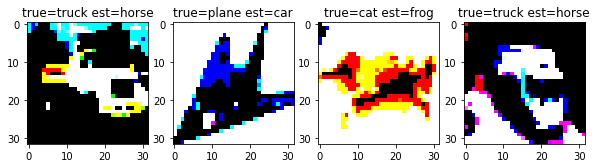

In [29]:
Ierr = np.where((pred != y_test))[0]
np.random.shuffle(Ierr)
nplt = 4
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Ierr[i]    
    plt_img(xVal[ind,:])        
    title = 'true={0:s} est={1:s}'.format(classesName[y_test[ind].astype(int)], classesName[pred[ind].astype(int)])
    plt.title(title)

### Using 500 Dimensions

In [30]:
# Reduce to 500 dimensions.

pca = PCA(n_components=500) # project from 3072 to 500 dimensions
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(500,)
(500, 3072)
(11000, 3072)
(11000, 500)


In [31]:

x_train=projected[:10000,:]
y_train=yTrain

x_test=projected[10000:,:]
y_test=yVal

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 500)
(10000,)
(1000, 500)
(1000,)


In [33]:
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [34]:
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Train Accuracy = 0.711700
[6 9 9 ... 1 1 7]


In [35]:
pred = svc.predict(x_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
print(pred)

Test Accuracy = 0.394000
[8 5 2 7 2 2 0 8 2 3 4 9 9 2 4 3 2 2 8 2 2 1 4 2 8 2 9 2 2 3 4 1 4 4 3 9 2
 7 2 3 1 6 8 8 6 1 2 7 5 2 0 4 5 4 8 4 4 9 7 2 8 2 2 9 9 9 1 0 4 3 2 7 2 4
 4 2 7 2 3 0 6 2 1 2 1 8 8 8 2 2 8 0 2 2 6 6 1 4 4 2 8 5 8 7 2 6 4 0 8 4 4
 7 9 3 4 1 3 2 2 6 3 4 1 9 2 9 2 2 0 3 0 2 9 2 8 6 2 4 4 7 2 4 2 2 2 6 6 1
 9 2 1 2 0 2 0 2 2 1 1 2 8 8 7 1 0 1 8 8 8 0 3 2 2 2 0 7 9 2 2 4 8 9 9 7 8
 2 1 4 5 2 5 8 4 8 8 8 8 3 4 7 4 8 2 7 1 1 9 2 9 6 4 9 1 2 2 2 3 9 7 8 2 2
 3 2 2 9 4 5 2 4 1 4 1 3 1 8 0 2 8 1 2 6 4 2 1 0 8 8 2 6 2 4 2 8 1 0 2 8 9
 5 4 6 7 2 7 2 9 5 2 1 4 3 4 9 2 2 2 6 2 9 4 2 6 2 9 4 3 9 5 6 2 8 4 4 4 9
 8 2 2 3 7 3 2 9 5 6 8 2 8 6 2 2 4 2 2 6 4 4 4 4 6 4 8 7 4 2 4 3 2 4 8 7 2
 5 2 4 8 1 0 2 8 2 6 4 8 2 2 0 4 2 2 2 4 2 9 7 2 2 8 4 2 9 2 7 2 1 6 4 4 9
 9 8 8 0 8 2 2 5 2 8 3 1 6 1 2 9 3 2 8 2 7 4 3 8 6 1 4 7 2 7 8 1 4 6 1 9 4
 2 2 1 6 1 2 9 4 8 1 2 4 3 8 6 4 0 2 4 1 8 6 8 2 2 4 6 8 1 1 5 6 0 6 0 8 8
 6 8 8 6 6 2 2 7 3 7 7 4 6 0 4 4 7 4 4 3 6 8 0 0 3 1 3 0 7 9 2 4 2 9 2 8 6
